In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [5]:
#The head() method returns the first 5 rows if a number is not specified
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#check for any null values
df.isnull().values.any()

False

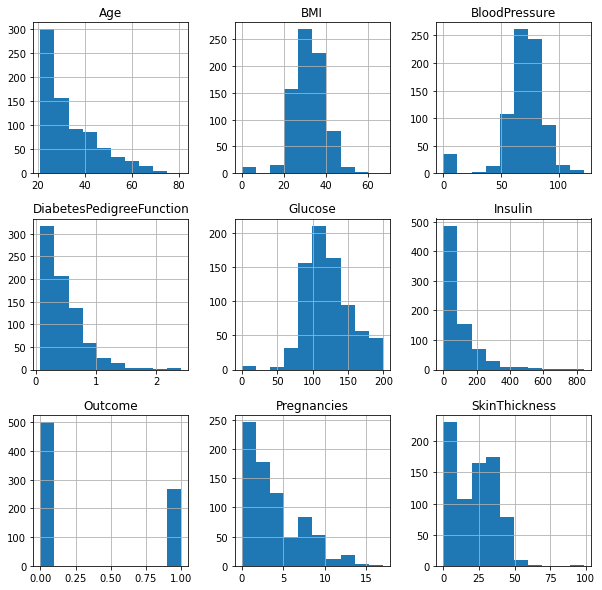

In [10]:
#data visualization - Histogram
df.hist(bins=10, figsize=(10,10))
plt.show()

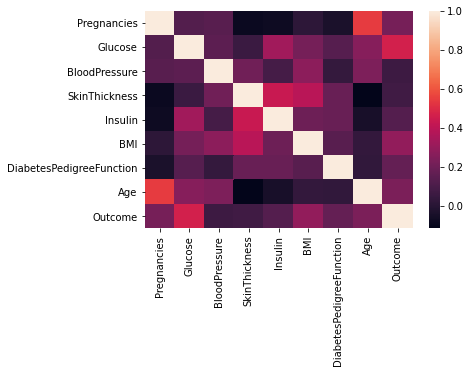

In [13]:
#data visualization - Correlation
sns.heatmap(df.corr())
#we can see can that skin thickness, insulin, preganancies and age are fully independent to each other
#age and pregnancies have negative correlation

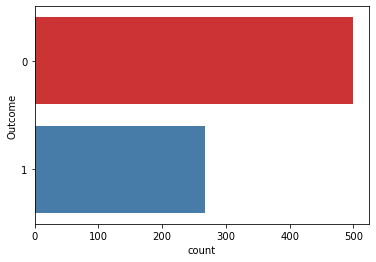

In [15]:
#total number of outcomes where diabetes is found vs not found
#0 means non diabetic and 1 means diabetic
sns.countplot(y=df['Outcome'], palette='Set1')

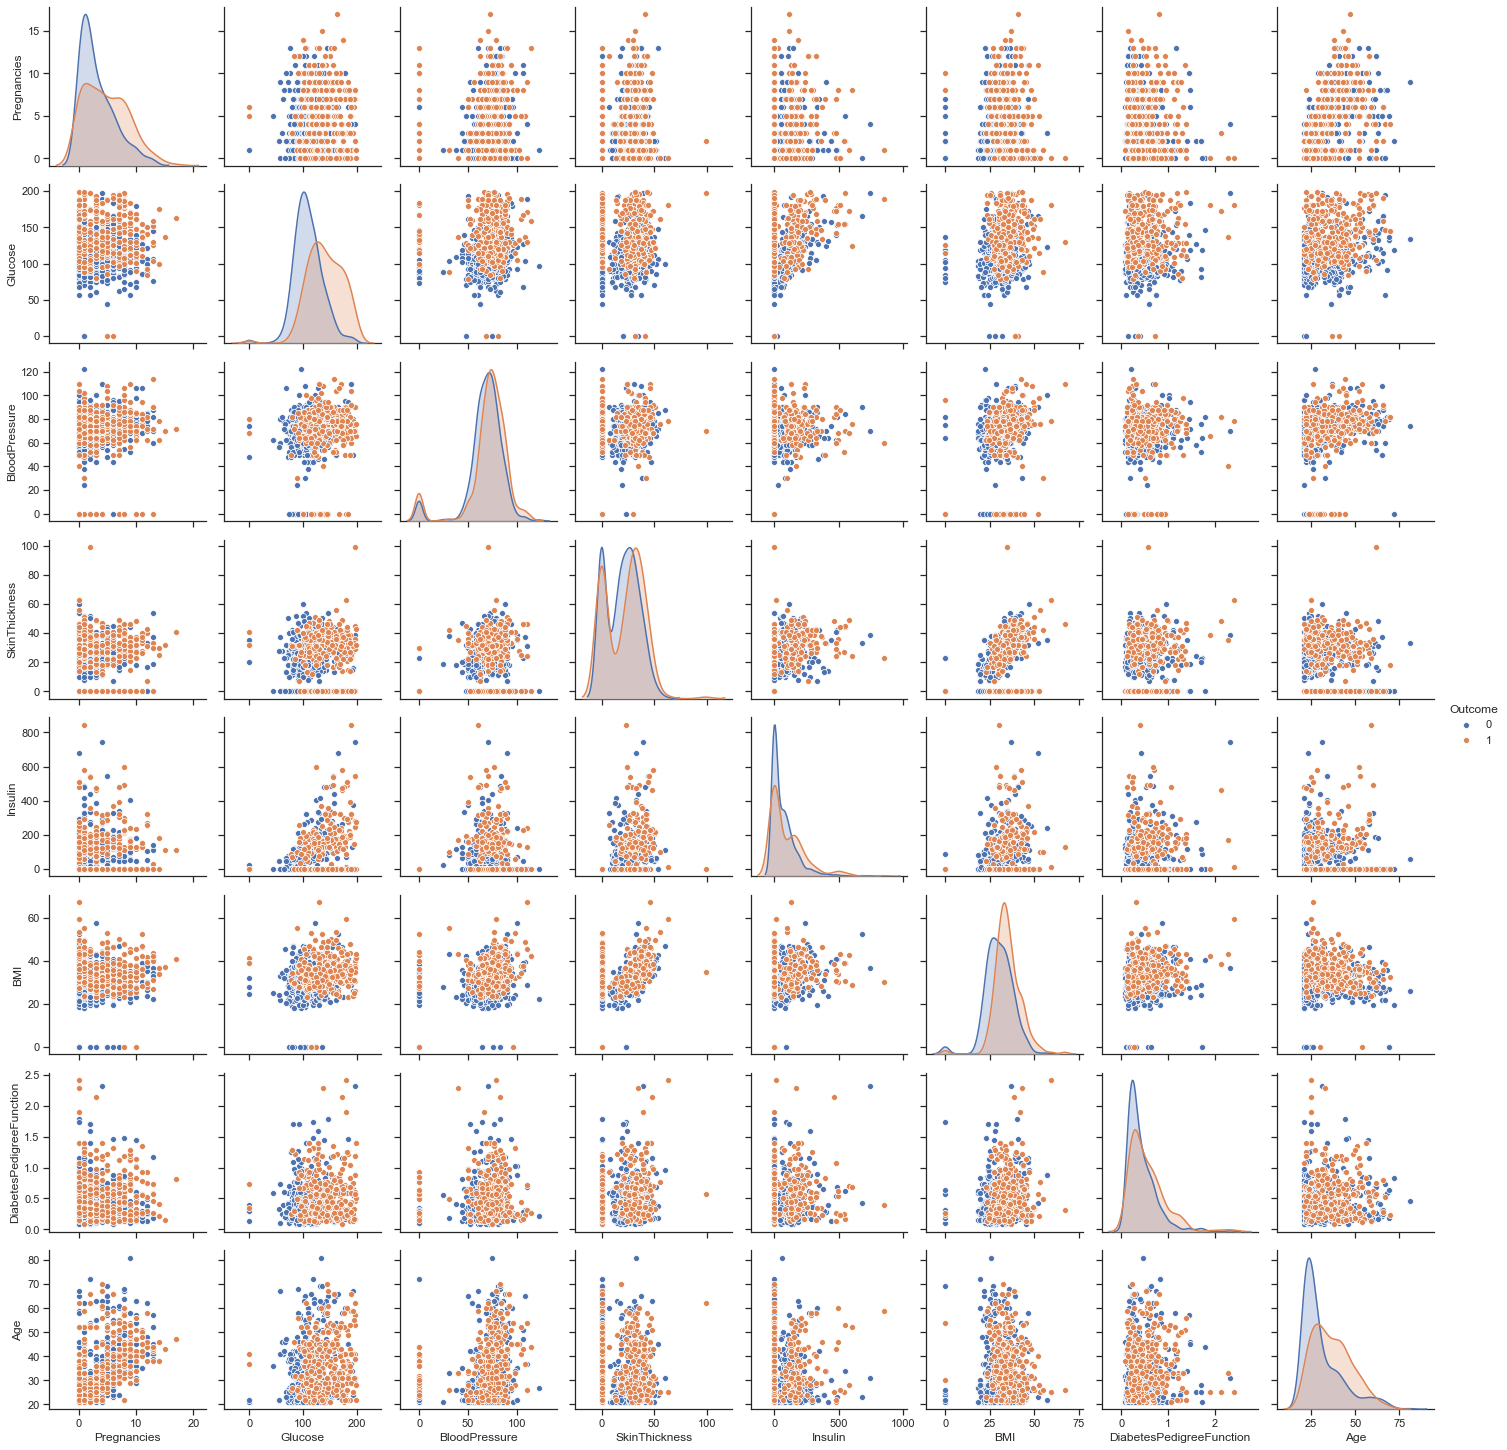

In [19]:
#each feature is plotted against all other features
sns.set(style='ticks')
sns.pairplot(df, hue="Outcome")

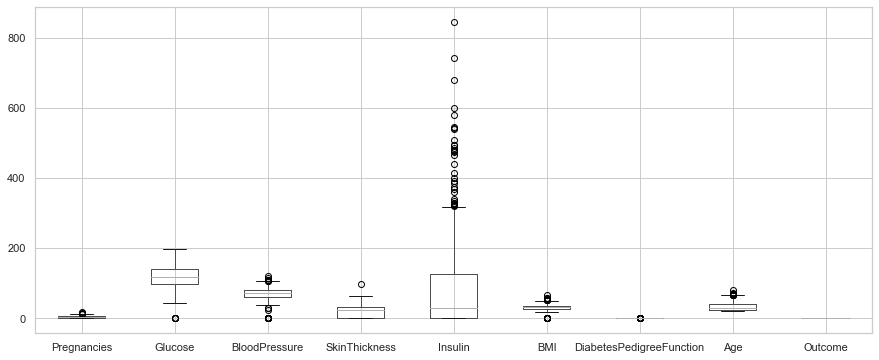

In [20]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

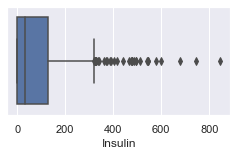

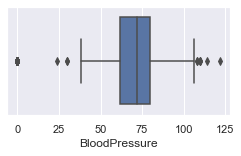

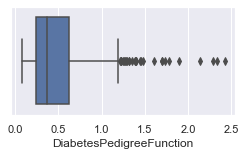

In [21]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [24]:
#outlier removal
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75) 
IQR = Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

In [27]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 100 records deleted

((768, 9), (639, 9))

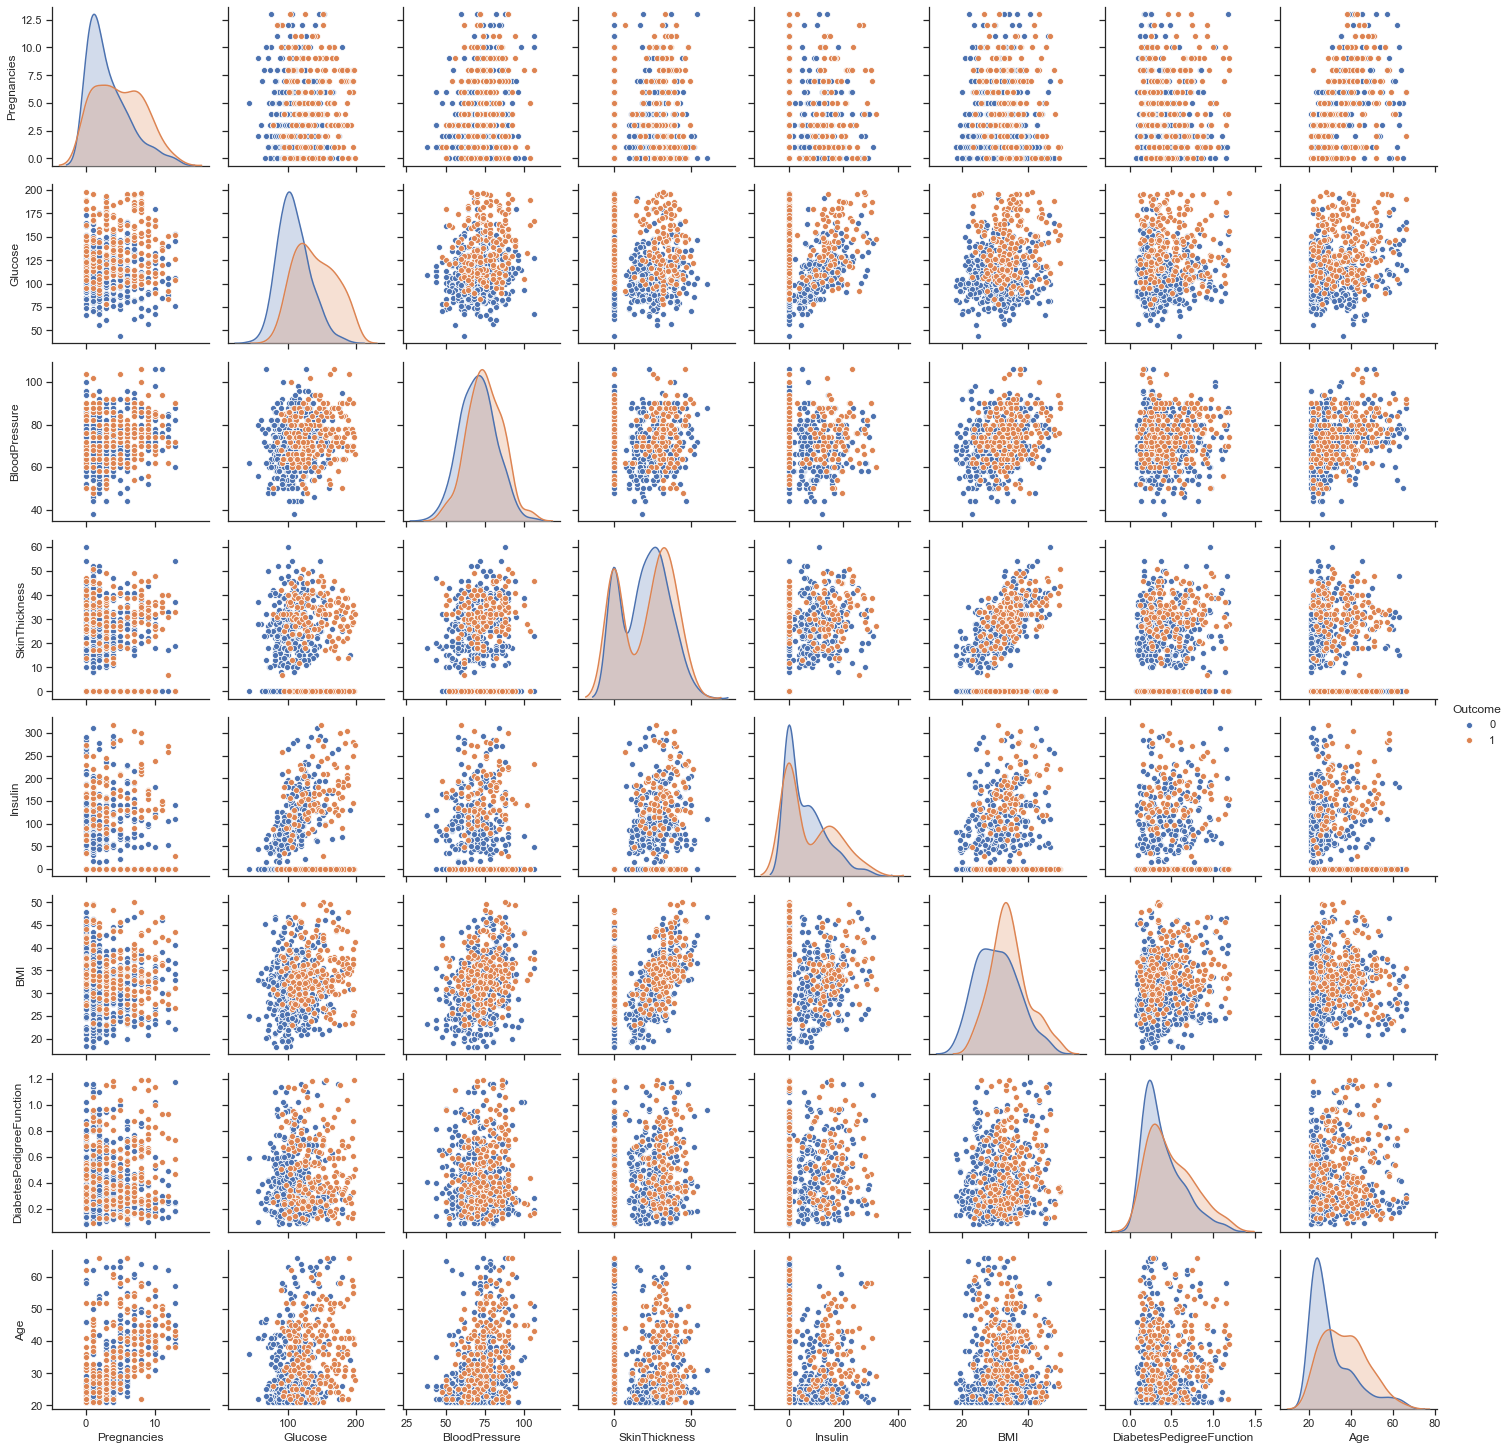

In [28]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

In [30]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [32]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((511, 8), (128, 8), (511,), (128,))

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [34]:
# Logistic Regression with increased max_iter and feature scaling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate

# Feature scaling
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

clf = LogisticRegression(max_iter=1000)  # Adjust max_iter as needed
clf.fit(train_X_scaled, train_y)
y_pred = clf.predict(test_X_scaled)

# Find accuracy
ac = accuracy_score(test_y, y_pred)

# Find the ROC_AUC score
rc = roc_auc_score(test_y, y_pred)

print("\nAccuracy {0} ROC {1}".format(ac, rc))

# Cross-validation
result = cross_validate(clf, train_X_scaled, train_y, scoring=scoring, cv=10)
display_result(result)



Accuracy 0.828125 ROC 0.7427977427977428
TP:  [11  8 10  8  5  8 11  6  8  9]
TN:  [33 34 28 30 29 31 33 33 29 31]
FN:  [ 6  8  6  8 11  8  5 10  9  8]
FP:  [2 1 7 5 6 4 2 2 5 3]


In [36]:
#Support Vector Machine
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
acc = []
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
roc = []
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.8203125 ROC 0.7292842292842293
TP:  [11  7  9  7  4  8 11  5  8  8]
TN:  [33 34 31 30 29 31 33 33 31 31]
FN:  [ 6  9  7  9 12  8  5 11  9  9]
FP:  [2 1 4 5 6 4 2 2 3 3]


In [37]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
acc = []
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
roc = []
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.78125 ROC 0.7419067419067419
TP:  [10  7 10  8  9 10 13  3  7  8]
TN:  [29 29 25 24 25 23 28 33 31 29]
FN:  [ 7  9  6  8  7  6  3 13 10  9]
FP:  [ 6  6 10 11 10 12  7  2  3  5]


In [38]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)
#find accuracy
acc = []
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
roc = []
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.828125 ROC 0.7267597267597267
TP:  [10 10 11  9  7  7 10  4  8  9]
TN:  [34 31 29 28 27 30 33 33 26 29]
FN:  [ 7  6  5  7  9  9  6 12  9  8]
FP:  [1 4 6 7 8 5 2 2 8 5]


In [39]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.796875 ROC 0.7448767448767448
TP:  [13 10 10  8  5 10 11  8  9 10]
TN:  [30 30 26 28 25 29 33 32 28 27]
FN:  [ 4  6  6  8 11  6  5  8  8  7]
FP:  [ 5  5  9  7 10  6  2  3  6  7]


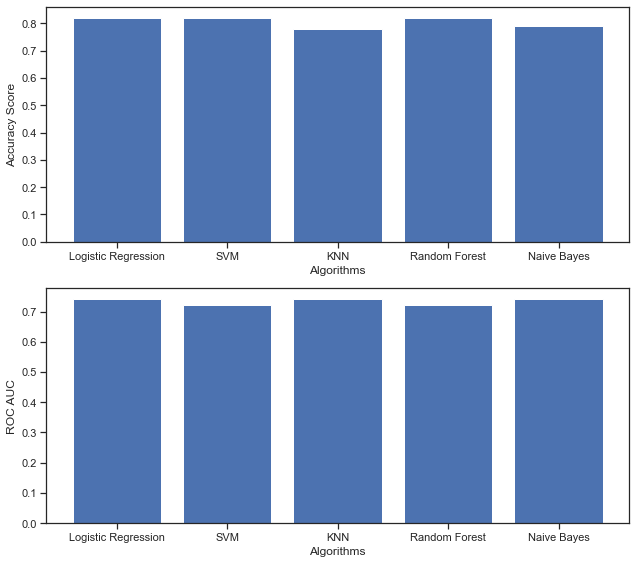

In [40]:
import matplotlib.pyplot as plt

# Example data for 'acc' and 'roc' (replace with your actual values)
acc = [0.82, 0.82, 0.78, 0.82, 0.79]  # Accuracy scores for Logistic Regression, SVM, KNN, Random Forest, Naive Bayes
roc = [0.74,  0.72, 0.74, 0.72, 0.74]  # ROC AUC scores for Logistic Regression, SVM, KNN, Random Forest, Naive Bayes

# Check if 'acc' and 'roc' have the same length
if len(acc) != len(roc):
    raise ValueError("The 'acc' and 'roc' lists must have the same number of elements.")

# Create a figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8))

# Plot Accuracy Scores
ax1.bar(['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Naive Bayes'], acc, label='Accuracy')
ax1.set_ylabel('Accuracy Score')
ax1.set_xlabel('Algorithms')

# Plot ROC AUC Scores
ax2.bar(['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Naive Bayes'], roc, label='ROC AUC')
ax2.set_ylabel('ROC AUC')
ax2.set_xlabel('Algorithms')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
#Great....
#Logistic Regression has highest accuracy 82% and ROC_AUC curve 74%
#model can be improve more if we take same count of labels
#in our model 30% is diabetic and 70% no diabetic patient

#model can be improve with fine tunning